# Model Training

In [1]:
import pandas as pd

from training.model import Model

### 1. Creating model

In [ ]:
model = Model(model_path="bert-base-multilingual-uncased")

### 2. Loading dataset

In [2]:
data_json = pd.read_json("data/preprocessed/covid", orient="records", lines=True)
len(data_json.loc[data_json["label"] == 1])

474

In [ ]:
dataset_1 = data_json.loc[data_json['label'] == 1].head(476)
dataset_2 = data_json.loc[data_json['label'] == 0].head(476)

dataset = pd.concat([dataset_1, dataset_2])
dataset = dataset.sample(frac=1, random_state=10)
dataset

In [5]:
tf_train, tf_test = model.prepare_train_test_data(dataset)

INFO:tensorflow:Assets written to: ram://dde8d933-4552-48c6-be75-a4f1f17dcf6c/assets


INFO:tensorflow:Assets written to: ram://dde8d933-4552-48c6-be75-a4f1f17dcf6c/assets


Map:   0%|          | 0/760 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


INFO:tensorflow:Assets written to: ram://e4d5f945-da1e-4fa4-8b31-a34662994774/assets


INFO:tensorflow:Assets written to: ram://e4d5f945-da1e-4fa4-8b31-a34662994774/assets


Map:   0%|          | 0/190 [00:00<?, ? examples/s]

### 3. Training

In [6]:
model.compile()
model.fit(train_data=tf_train, epochs=5, validation_data=tf_test)

Epoch 1/5
47/47 [==============================] - 38s 485ms/step - loss: 0.3923 - accuracy: 0.8644 - f1_m: 0.4625 - val_loss: 0.3089 - val_accuracy: 0.8750 - val_f1_m: 0.6620
Epoch 2/5
47/47 [==============================] - 20s 417ms/step - loss: 0.1137 - accuracy: 0.9628 - f1_m: 0.6400 - val_loss: 0.3068 - val_accuracy: 0.9034 - val_f1_m: 0.6780
Epoch 3/5
47/47 [==============================] - 19s 410ms/step - loss: 0.0383 - accuracy: 0.9867 - f1_m: 0.6405 - val_loss: 0.3906 - val_accuracy: 0.9034 - val_f1_m: 0.6696
Epoch 4/5
47/47 [==============================] - 20s 415ms/step - loss: 0.0169 - accuracy: 0.9947 - f1_m: 0.6508 - val_loss: 0.2644 - val_accuracy: 0.9375 - val_f1_m: 0.6808
Epoch 5/5
47/47 [==============================] - 20s 418ms/step - loss: 0.0600 - accuracy: 0.9787 - f1_m: 0.6481 - val_loss: 0.2823 - val_accuracy: 0.9375 - val_f1_m: 0.6849


### 4. Model saving

In [7]:
COVID_MODEL_PATH = "model/covid/english_bert-base-multilingual-uncased_v1.h5py"

In [8]:
model.save_model(COVID_MODEL_PATH)

### 5. Separate evaluation

In [12]:
results = model.evaluate(dataset=tf_test)
test_loss = results[0]
test_accuracy = results[1]

print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

### 6. Testing

In [13]:
text = "WhatsApp censors the messages that circulate on its platform if it believes that they are hoaxes with the help of the media that verify false information in Spain." # 0
# text = "Coronavirus: New Covid-19 tracing tool appears on smartphones" # 1
# text = "Good oral hygiene destroys the coronavirus and prevents its spread" # 0
# text = "Post about a video claims that it is a protest against confination in the town of Aranda de Duero (Burgos)" # 0

prediction = model.classify_text(text=text)
print(prediction)

### 7. Multiple training

In [1]:
import pandas as pd

from training.model import Model

#### 7.1 Creating dataset

In [2]:
data_json = pd.read_json("data/preprocessed/covid", orient="records", lines=True)
len(data_json.loc[data_json["label"] == 1])

474

##### 7.1.1 balanced dataset

In [3]:
dataset_1 = data_json.loc[data_json['label'] == 1].head(476)
dataset_2 = data_json.loc[data_json['label'] == 0].head(476)

dataset = pd.concat([dataset_1, dataset_2])
dataset = dataset.sample(frac=1, random_state=10)
dataset

,text,label,hashtags,emojis,polarity,subjectivity,sentiment
187,The ESP tested less than 5 e of the inhabitant...,0,[],[],-0.166667,0.066667,negative
3110,Non immigrant like HOB visa pivotal to Post CO...,1,[],[],0.500000,0.800000,positive
3016,Google launches COVID-9 page and search portal...,1,[],[],0.500000,0.500000,positive
44,A picture allegedly showing a crowd in Berlin ...,0,[],[],-0.050000,0.050000,negative
3066,Rs 3 lake for COVID treatment e Delhi hospital...,1,[],[],0.000000,0.000000,neutral
...,...,...,...,...,...,...,...
3195,Maharashtra Reports 1st COVID-9 Cases e 344 De...,1,[],[],0.000000,0.000000,neutral
3146,Google Helps Place Ads on Sites Amplifying COV...,1,[],[],0.000000,0.000000,neutral
53,A picture allegedly showing a large crowd gath...,0,[],[],0.057143,0.264286,positive
2951,e How to make COVID vaccine at home e among th...,1,[],[],0.500000,0.500000,positive


##### 7.1.2 full dataset

In [10]:
dataset_1_full = data_json.loc[data_json['label'] == 1]
dataset_2_full = data_json.loc[data_json['label'] == 0]

dataset_full = pd.concat([dataset_1_full, dataset_2_full])
dataset_full = dataset_full.sample(frac=1, random_state=10)
dataset_full

,text,label,hashtags,emojis,polarity,subjectivity,sentiment
9626,The label on Detox disinfectant spray claims i...,0,[],[],0.136364,0.454545,positive
4199,The largest hole in the ozone layer over the A...,0,[],[],-0.140278,0.331944,negative
2849,The flu din e t kill any Americans this year e,0,[],[],0.000000,0.000000,neutral
9952,e Cocaine kills coronavirus e scientists are s...,0,[],[],-0.700000,0.800000,negative
9715,Photos show coronavirus is found in broiler ch...,0,[],[],-0.600000,0.950000,negative
...,...,...,...,...,...,...,...
9371,Exactly every 100 years e a viral epidemic bre...,0,[],[],0.250000,0.250000,positive
7276,Washington admits it is the responsible for CO...,0,[],[],0.200000,0.550000,positive
870,Photo of a man trying to resurrect his grandmo...,0,[],[],0.000000,0.000000,neutral
7278,George Sores is one of the people responsible ...,0,[],[],0.168182,0.502273,positive


#### 7.2 bert-base-multilingual-uncased (v1)

##### 7.2.1 balanced dataset

In [6]:
model_v1 = Model(model_path="bert-base-multilingual-uncased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
tf_train_v1, tf_test_v1 = model_v1.prepare_train_test_data(dataset)

INFO:tensorflow:Assets written to: ram://474abe84-be6c-4e49-8013-be633f3bd8e7/assets


INFO:tensorflow:Assets written to: ram://474abe84-be6c-4e49-8013-be633f3bd8e7/assets


Map:   0%|          | 0/760 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


INFO:tensorflow:Assets written to: ram://db3ca6e3-d0d7-46ad-a950-17e61bb3b075/assets


INFO:tensorflow:Assets written to: ram://db3ca6e3-d0d7-46ad-a950-17e61bb3b075/assets


Map:   0%|          | 0/190 [00:00<?, ? examples/s]

In [8]:
model_v1.compile()
model_v1.fit(train_data=tf_train_v1, epochs=5, validation_data=tf_test_v1)

Epoch 1/5
47/47 [==============================] - 37s 495ms/step - loss: 0.3503 - accuracy: 0.8617 - f1_m: 0.5302 - val_loss: 0.2685 - val_accuracy: 0.9034 - val_f1_m: 0.6713
Epoch 2/5
47/47 [==============================] - 20s 432ms/step - loss: 0.1216 - accuracy: 0.9535 - f1_m: 0.6532 - val_loss: 0.1866 - val_accuracy: 0.9318 - val_f1_m: 0.6647
Epoch 3/5
47/47 [==============================] - 20s 421ms/step - loss: 0.0493 - accuracy: 0.9827 - f1_m: 0.6467 - val_loss: 0.3766 - val_accuracy: 0.9034 - val_f1_m: 0.6744
Epoch 4/5
47/47 [==============================] - 20s 432ms/step - loss: 0.0121 - accuracy: 0.9973 - f1_m: 0.6493 - val_loss: 0.3765 - val_accuracy: 0.9091 - val_f1_m: 0.6783
Epoch 5/5
47/47 [==============================] - 20s 424ms/step - loss: 0.0019 - accuracy: 1.0000 - f1_m: 0.6499 - val_loss: 0.4645 - val_accuracy: 0.9034 - val_f1_m: 0.6682


In [9]:
text = "WhatsApp censors the messages that circulate on its platform if it believes that they are hoaxes with the help of the media that verify false information in Spain." # 0

In [11]:
prediction_1 = model_v1.classify_text(text=text)

Predicted class: 0
Probability distribution: [9.9925196e-01 7.4803270e-04]


In [12]:
text = "Coronavirus: New Covid-19 tracing tool appears on smartphones" # 1

In [13]:
prediction_2 = model_v1.classify_text(text=text)

Predicted class: 1
Probability distribution: [0.00115485 0.99884516]


In [14]:
COVID_MODEL_V1_PATH = "model/covid/model_v1.h5py"

In [15]:
model_v1.save_model(COVID_MODEL_V1_PATH)

##### 7.2.2 full dataset

In [4]:
model_full_v1 = Model(model_path="bert-base-multilingual-uncased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
tf_train_full_v1, tf_test_full_v1 = model_full_v1.prepare_train_test_data(dataset_full)

INFO:tensorflow:Assets written to: ram://58238f8d-8c0a-45d9-af23-d7a0f3daae6e/assets


INFO:tensorflow:Assets written to: ram://58238f8d-8c0a-45d9-af23-d7a0f3daae6e/assets


Map:   0%|          | 0/8160 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


INFO:tensorflow:Assets written to: ram://f0355d65-f0b7-4e18-8fea-8a7e3ebfd436/assets


INFO:tensorflow:Assets written to: ram://f0355d65-f0b7-4e18-8fea-8a7e3ebfd436/assets


Map:   0%|          | 0/2041 [00:00<?, ? examples/s]

In [ ]:
model_full_v1.compile()
model_full_v1.fit(train_data=tf_train_full_v1, epochs=5, validation_data=tf_test_full_v1)

In [ ]:
text = "WhatsApp censors the messages that circulate on its platform if it believes that they are hoaxes with the help of the media that verify false information in Spain." # 0

In [ ]:
prediction_1 = model_full_v1.classify_text(text=text)

In [ ]:
text = "Coronavirus: New Covid-19 tracing tool appears on smartphones" # 1

In [ ]:
prediction_2 = model_full_v1.classify_text(text=text)

In [ ]:
COVID_MODEL_FULL_V1_PATH = "model/covid/model_full_v1.h5py"

In [ ]:
model_full_v1.save_model(COVID_MODEL_FULL_V1_PATH)

#### 7.3 XLM-RoBERTa (v2)

##### 7.3.1 balanced dataset

In [4]:
model_v2 = Model(model_path="xlm-roberta-base")

2023-05-20 14:59:05.512778: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
All model checkpoint layers were used when initializing TFXLMRobertaForSequenceClassification.

Some layers of TFXLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
tf_train_v2, tf_test_v2 = model_v2.prepare_train_test_data(dataset)

INFO:tensorflow:Assets written to: ram://afb82f8b-54d2-4415-b6dc-1193c42baa2f/assets


INFO:tensorflow:Assets written to: ram://afb82f8b-54d2-4415-b6dc-1193c42baa2f/assets


Map:   0%|          | 0/760 [00:00<?, ? examples/s]

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


INFO:tensorflow:Assets written to: ram://d454cb68-4b86-4253-a17c-c88acf9dbc52/assets


INFO:tensorflow:Assets written to: ram://d454cb68-4b86-4253-a17c-c88acf9dbc52/assets


Map:   0%|          | 0/190 [00:00<?, ? examples/s]

In [6]:
model_v2.compile()
model_v2.fit(train_data=tf_train_v2, epochs=5, validation_data=tf_test_v2)

Epoch 1/5
47/47 [==============================] - 273s 6s/step - loss: 0.5997 - accuracy: 0.6928 - f1_m: 0.3046 - val_loss: 0.3804 - val_accuracy: 0.9148 - val_f1_m: 0.9123
Epoch 2/5
47/47 [==============================] - 264s 6s/step - loss: 0.4452 - accuracy: 0.8152 - f1_m: 0.6385 - val_loss: 0.6868 - val_accuracy: 0.5227 - val_f1_m: 0.0242
Epoch 3/5
47/47 [==============================] - 275s 6s/step - loss: 0.3485 - accuracy: 0.8351 - f1_m: 0.4901 - val_loss: 0.1676 - val_accuracy: 0.9318 - val_f1_m: 0.6919
Epoch 4/5
47/47 [==============================] - 278s 6s/step - loss: 0.1720 - accuracy: 0.9441 - f1_m: 0.6320 - val_loss: 0.1386 - val_accuracy: 0.9602 - val_f1_m: 0.6669
Epoch 5/5
47/47 [==============================] - 284s 6s/step - loss: 0.1095 - accuracy: 0.9694 - f1_m: 0.6351 - val_loss: 0.1280 - val_accuracy: 0.9773 - val_f1_m: 0.6873


In [7]:
text = "WhatsApp censors the messages that circulate on its platform if it believes that they are hoaxes with the help of the media that verify false information in Spain." # 0

In [8]:
prediction_1 = model_v2.classify_text(text=text)

Predicted class: 0
Probability distribution: [0.99733955 0.00266042]


In [9]:
text = "Coronavirus: New Covid-19 tracing tool appears on smartphones" # 1

In [10]:
prediction_2 = model_v2.classify_text(text=text)

Predicted class: 1
Probability distribution: [0.00473887 0.99526113]


In [11]:
COVID_MODEL_V2_PATH = "model/covid/model_v2.h5py"

In [12]:
model_v2.save_model(COVID_MODEL_V2_PATH)

#### 7.4 xlm-mlm-100-1280 (v3)

##### 7.4.1 balanced dataset

In [4]:
model_v3 = Model(model_path="xlm-mlm-100-1280")

2023-05-20 21:02:02.987684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Some layers from the model checkpoint at xlm-mlm-100-1280 were not used when initializing TFXLMForSequenceClassification: ['pred_layer_._proj']
- This IS expected if you are initializing TFXLMForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of

In [5]:
tf_train_v3, tf_test_v3 = model_v3.prepare_train_test_data(dataset)

INFO:tensorflow:Assets written to: ram://8e4264f2-77ed-4018-a154-ba013ee7a4c2/assets


INFO:tensorflow:Assets written to: ram://8e4264f2-77ed-4018-a154-ba013ee7a4c2/assets


Map:   0%|          | 0/760 [00:00<?, ? examples/s]

INFO:tensorflow:Assets written to: ram://bd8133df-0488-46c5-82ab-41eab49698d7/assets


INFO:tensorflow:Assets written to: ram://bd8133df-0488-46c5-82ab-41eab49698d7/assets


Map:   0%|          | 0/190 [00:00<?, ? examples/s]

In [6]:
model_v3.compile()
model_v3.fit(train_data=tf_train_v3, epochs=5, validation_data=tf_test_v3)

Epoch 1/5
47/47 [==============================] - 924s 20s/step - loss: 0.9339 - accuracy: 0.5878 - f1_m: 0.5858 - val_loss: 0.6897 - val_accuracy: 0.5739 - val_f1_m: 0.0000e+00
Epoch 2/5
47/47 [==============================] - 968s 21s/step - loss: 0.8354 - accuracy: 0.5093 - f1_m: 0.3785 - val_loss: 0.6835 - val_accuracy: 0.5739 - val_f1_m: 0.0000e+00
Epoch 3/5
47/47 [==============================] - 976s 21s/step - loss: 0.7623 - accuracy: 0.5093 - f1_m: 0.2837 - val_loss: 0.7301 - val_accuracy: 0.4261 - val_f1_m: 0.0000e+00
Epoch 4/5
47/47 [==============================] - 953s 20s/step - loss: 0.7672 - accuracy: 0.4867 - f1_m: 0.2667 - val_loss: 0.6923 - val_accuracy: 0.5682 - val_f1_m: 0.0000e+00
Epoch 5/5
47/47 [==============================] - 983s 21s/step - loss: 0.7802 - accuracy: 0.4934 - f1_m: 0.3233 - val_loss: 0.7789 - val_accuracy: 0.4261 - val_f1_m: 0.0000e+00


In [7]:
text = "WhatsApp censors the messages that circulate on its platform if it believes that they are hoaxes with the help of the media that verify false information in Spain." # 0

In [8]:
prediction_1 = model_v3.classify_text(text=text)

Predicted class: 0
Probability distribution: [9.9959189e-01 4.0814895e-04]


In [9]:
text = "Coronavirus: New Covid-19 tracing tool appears on smartphones" # 1

In [10]:
prediction_2 = model_v3.classify_text(text=text)

Predicted class: 0
Probability distribution: [0.9653521  0.03464787]


In [11]:
COVID_MODEL_V3_PATH = "model/covid/model_v3.h5py"

In [12]:
model_v3.save_model(COVID_MODEL_V3_PATH)

### Evaluation

In [22]:
from training.model import Model

model_test = Model.load_saved_model('model/covid/model_v3.h5py', useGPU=False)

All model checkpoint layers were used when initializing TFXLMForSequenceClassification.

All the layers of TFXLMForSequenceClassification were initialized from the model checkpoint at model/covid/model_v3.h5py.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMForSequenceClassification for predictions without further training.


In [23]:
y_pred = []

for index, row in dataset.iterrows():
    text = row['text']
    y_pred.append(model_test.classify_text(text, printing=False)[0])

In [24]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [25]:
y_true = dataset["label"].tolist()
y_true

[0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,


In [26]:
from evaluation.model_evaluator import ModelEvaluator

ModelEvaluator.calculate_metrics(y_true, y_pred)

Accuracy:  0.50105
Precision:  0.0
Recall:  0.0
F1 score:  0.0


/Users/adamdabkowski/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.50105, 0.0, 0.0, 0.0]

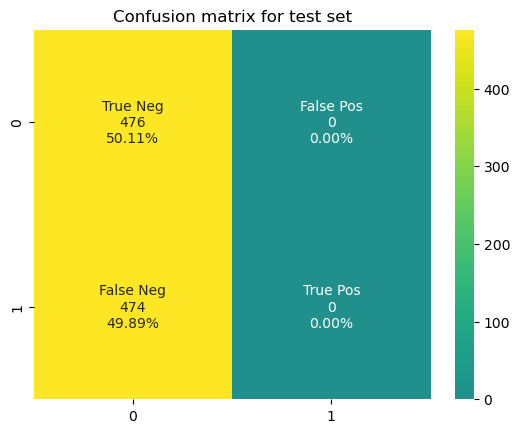

In [27]:
ModelEvaluator.plot_confusion_matrix(y_true, y_pred)